In [1]:
import pandas as pd
df_1 = pd.read_csv('tabularData.csv')
df_1.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


One hot encoding done for 'View Position' and 'Patient Gender'

In [3]:
df_encoded = pd.get_dummies(df_1, columns=['View Position', 'Patient Gender'], drop_first=True)
df_encoded

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],View Position_PA,Patient Gender_M
0,00000001_000.png,Cardiomegaly,0,1,57,2682,2749,0.143,0.143,True,True
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,2894,2729,0.143,0.143,True,True
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,2500,2048,0.168,0.168,True,True
3,00000002_000.png,No Finding,0,2,80,2500,2048,0.171,0.171,True,True
4,00000003_001.png,Hernia,0,3,74,2500,2048,0.168,0.168,True,False
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,2048,2500,0.168,0.168,True,True
112116,00030802_000.png,No Finding,0,30802,28,2048,2500,0.168,0.168,True,True
112117,00030803_000.png,No Finding,0,30803,42,2048,2500,0.168,0.168,True,False
112118,00030804_000.png,No Finding,0,30804,29,2048,2500,0.168,0.168,True,False


In [5]:
df_encoded[['View Position_PA', 'Patient Gender_M']] = df_encoded[['View Position_PA', 'Patient Gender_M']].astype(int)
df_encoded

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],View Position_PA,Patient Gender_M
0,00000001_000.png,Cardiomegaly,0,1,57,2682,2749,0.143,0.143,1,1
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,2894,2729,0.143,0.143,1,1
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,2500,2048,0.168,0.168,1,1
3,00000002_000.png,No Finding,0,2,80,2500,2048,0.171,0.171,1,1
4,00000003_001.png,Hernia,0,3,74,2500,2048,0.168,0.168,1,0
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,2048,2500,0.168,0.168,1,1
112116,00030802_000.png,No Finding,0,30802,28,2048,2500,0.168,0.168,1,1
112117,00030803_000.png,No Finding,0,30803,42,2048,2500,0.168,0.168,1,0
112118,00030804_000.png,No Finding,0,30804,29,2048,2500,0.168,0.168,1,0


Multi Hot Encoding done for the diseases in Finding Labels

In [7]:
from sklearn.preprocessing import MultiLabelBinarizer
labels = df_encoded['Finding Labels'].str.split('|').apply(lambda x: list(set(x)))
mlb = MultiLabelBinarizer()
multi_hot_encoded = mlb.fit_transform(labels)

label_classes = list(mlb.classes_)
df_encoded['Encoded Vectors'] = [list(row) for row in multi_hot_encoded]
final_df = df_encoded.copy() 


In [9]:
final_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],View Position_PA,Patient Gender_M,Encoded Vectors
0,00000001_000.png,Cardiomegaly,0,1,57,2682,2749,0.143,0.143,1,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,2894,2729,0.143,0.143,1,1,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,2500,2048,0.168,0.168,1,1,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,00000002_000.png,No Finding,0,2,80,2500,2048,0.171,0.171,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
4,00000003_001.png,Hernia,0,3,74,2500,2048,0.168,0.168,1,0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,2048,2500,0.168,0.168,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]"
112116,00030802_000.png,No Finding,0,30802,28,2048,2500,0.168,0.168,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
112117,00030803_000.png,No Finding,0,30803,42,2048,2500,0.168,0.168,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
112118,00030804_000.png,No Finding,0,30804,29,2048,2500,0.168,0.168,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


Saving the unique labels for predicting disease

In [11]:
labels_2 = df_encoded['Finding Labels'].str.split('|').tolist()

In [13]:
flat_labels = [item for sublist in labels_2 for item in sublist]
unique_labels = set(flat_labels)
unique_labels = list(unique_labels)
print(len(unique_labels))

15


Saving the vectorized images 

In [15]:
df_2 = pd.read_csv('vit_image_vectors.csv')

In [19]:
df_2.head(10)

,image_name,vit_feature_0,vit_feature_1,vit_feature_2,vit_feature_3,vit_feature_4,vit_feature_5,vit_feature_6,vit_feature_7,vit_feature_8,...,vit_feature_758,vit_feature_759,vit_feature_760,vit_feature_761,vit_feature_762,vit_feature_763,vit_feature_764,vit_feature_765,vit_feature_766,vit_feature_767
0,00018805_001.png,0.365076,0.534673,-0.416475,2.848874,1.751811,-1.304646,-0.256162,1.102392,0.988376,...,1.433443,-0.224923,0.150629,-1.811442,0.524347,-0.626196,-3.397261,1.243231,-1.666132,-0.248143
1,00005868_002.png,-0.209933,0.906991,-0.840952,1.306317,1.035339,-1.115993,-0.912859,0.051292,2.947062,...,1.248080,0.151439,-0.418379,-1.561314,1.094912,-0.819124,-2.852275,0.398884,-0.922298,0.226146
2,00009663_000.png,0.080392,0.467482,-1.281360,1.695611,0.649343,-0.380356,-0.929672,-0.376239,1.893248,...,1.847296,-0.631442,-0.613052,-1.650481,0.876780,-0.997816,-2.162594,0.990335,-1.217691,0.566284
3,00022156_007.png,0.458993,0.390307,-1.628377,0.948999,0.587934,-0.249816,-0.996431,-0.217771,1.995029,...,1.513978,-1.135230,-0.651766,-1.733903,0.479165,-0.347443,-2.885047,0.936505,-1.138296,0.510604
4,00005395_004.png,0.942428,0.481875,-1.381462,1.562363,1.115155,-0.741470,-1.067550,0.106215,1.846381,...,1.277619,-0.678177,-0.114453,-1.844928,0.691937,-0.647038,-3.359325,0.604645,-1.437054,0.213092
5,00006966_004.png,0.067757,0.683653,-1.488925,1.632165,1.211087,-0.544543,-0.098523,-0.821394,2.809081,...,0.339622,-1.656021,-0.369539,-1.619090,0.621014,-0.937898,-2.647691,0.802948,-1.485421,0.672628
6,00000324_013.png,-0.509114,0.395474,-1.405395,1.605365,1.127664,-0.366543,-0.576874,-0.003062,2.294071,...,0.685596,-0.677632,-0.849896,-1.376894,0.974804,-0.378037,-2.785085,0.881903,-1.131686,0.801837
7,00007442_018.png,-0.004225,0.955738,-0.926470,2.345432,1.927462,-0.683362,-0.830154,-0.202158,3.114384,...,1.138681,-1.789616,-0.594868,-1.840591,0.308195,-0.659578,-3.274184,0.374570,-0.312362,-0.140363
8,00003923_012.png,-0.573599,1.446923,1.068983,3.346972,1.650820,-2.321039,0.921447,1.133517,1.761905,...,-0.450441,-2.056905,-0.795443,-1.753299,0.589413,0.276907,-1.666169,-0.171045,-1.096110,0.943365
9,00028483_007.png,-0.283667,0.599988,-1.300040,0.819946,0.914346,-0.943615,-0.433985,-0.621172,2.321652,...,1.575940,-1.441024,-1.315355,-2.300305,0.573102,0.409380,-3.290578,0.756421,-1.275299,0.324485


Merging the image vectors with tabular data

In [21]:
merged_df = pd.merge(final_df, df_2, left_on="Image Index", right_on="image_name", how="inner") 
merged_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],View Position_PA,...,vit_feature_758,vit_feature_759,vit_feature_760,vit_feature_761,vit_feature_762,vit_feature_763,vit_feature_764,vit_feature_765,vit_feature_766,vit_feature_767
0,00000001_000.png,Cardiomegaly,0,1,57,2682,2749,0.143,0.143,1,...,1.547655,-0.620812,-0.745321,-1.679115,0.206384,-1.296968,-3.138456,1.013506,-1.062506,0.352527
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,2894,2729,0.143,0.143,1,...,1.707529,-0.747789,-0.689462,-1.682848,-0.528151,-0.658697,-2.420458,0.558089,-1.109663,0.516162
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,2500,2048,0.168,0.168,1,...,1.689969,-1.129865,-0.613706,-1.980995,0.519705,-0.369260,-2.618308,1.259225,-0.862625,0.072922
3,00000002_000.png,No Finding,0,2,80,2500,2048,0.171,0.171,1,...,1.350985,-1.127660,-0.811818,-2.318414,0.462277,-0.211547,-2.799751,1.136780,-0.980697,0.728097
4,00000003_001.png,Hernia,0,3,74,2500,2048,0.168,0.168,1,...,1.557945,-0.697198,-0.345042,-1.862674,1.074908,-0.801665,-2.736844,0.649395,-0.956203,0.156580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,2048,2500,0.168,0.168,1,...,1.719308,-0.904871,0.341534,-1.313904,0.983860,-1.624623,-3.323015,0.184046,-1.427057,0.414642
112116,00030802_000.png,No Finding,0,30802,28,2048,2500,0.168,0.168,1,...,1.670004,-0.890307,-0.016896,-1.453848,0.582601,-1.546216,-2.998064,0.245877,-1.577534,0.170329
112117,00030803_000.png,No Finding,0,30803,42,2048,2500,0.168,0.168,1,...,1.419657,0.101114,-0.360508,-1.652597,0.662944,-1.298631,-2.797545,0.056933,-1.206345,0.235517
112118,00030804_000.png,No Finding,0,30804,29,2048,2500,0.168,0.168,1,...,1.259841,-0.743916,-0.325576,-1.735577,1.435712,-0.642635,-2.583702,0.936306,-1.711690,0.268101


In [23]:
merged_df.drop(columns=["image_name", "Image Index", "Finding Labels"], inplace=True)
merged_df

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],View Position_PA,Patient Gender_M,Encoded Vectors,...,vit_feature_758,vit_feature_759,vit_feature_760,vit_feature_761,vit_feature_762,vit_feature_763,vit_feature_764,vit_feature_765,vit_feature_766,vit_feature_767
0,0,1,57,2682,2749,0.143,0.143,1,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,1.547655,-0.620812,-0.745321,-1.679115,0.206384,-1.296968,-3.138456,1.013506,-1.062506,0.352527
1,1,1,58,2894,2729,0.143,0.143,1,1,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,1.707529,-0.747789,-0.689462,-1.682848,-0.528151,-0.658697,-2.420458,0.558089,-1.109663,0.516162
2,2,1,58,2500,2048,0.168,0.168,1,1,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,1.689969,-1.129865,-0.613706,-1.980995,0.519705,-0.369260,-2.618308,1.259225,-0.862625,0.072922
3,0,2,80,2500,2048,0.171,0.171,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",...,1.350985,-1.127660,-0.811818,-2.318414,0.462277,-0.211547,-2.799751,1.136780,-0.980697,0.728097
4,0,3,74,2500,2048,0.168,0.168,1,0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",...,1.557945,-0.697198,-0.345042,-1.862674,1.074908,-0.801665,-2.736844,0.649395,-0.956203,0.156580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,1,30801,38,2048,2500,0.168,0.168,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]",...,1.719308,-0.904871,0.341534,-1.313904,0.983860,-1.624623,-3.323015,0.184046,-1.427057,0.414642
112116,0,30802,28,2048,2500,0.168,0.168,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",...,1.670004,-0.890307,-0.016896,-1.453848,0.582601,-1.546216,-2.998064,0.245877,-1.577534,0.170329
112117,0,30803,42,2048,2500,0.168,0.168,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",...,1.419657,0.101114,-0.360508,-1.652597,0.662944,-1.298631,-2.797545,0.056933,-1.206345,0.235517
112118,0,30804,29,2048,2500,0.168,0.168,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",...,1.259841,-0.743916,-0.325576,-1.735577,1.435712,-0.642635,-2.583702,0.936306,-1.711690,0.268101


In [25]:
merged_df.dtypes

Follow-up #              int64
Patient ID               int64
Patient Age              int64
OriginalImage[Width      int64
Height]                  int64
                        ...   
vit_feature_763        float64
vit_feature_764        float64
vit_feature_765        float64
vit_feature_766        float64
vit_feature_767        float64
Length: 778, dtype: object

In [27]:
label_classes

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [29]:
merged_df.drop(columns=["Patient ID", "Follow-up #"], inplace=True)
merged_df

,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],View Position_PA,Patient Gender_M,Encoded Vectors,vit_feature_0,vit_feature_1,...,vit_feature_758,vit_feature_759,vit_feature_760,vit_feature_761,vit_feature_762,vit_feature_763,vit_feature_764,vit_feature_765,vit_feature_766,vit_feature_767
0,57,2682,2749,0.143,0.143,1,1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.393484,1.886240,...,1.547655,-0.620812,-0.745321,-1.679115,0.206384,-1.296968,-3.138456,1.013506,-1.062506,0.352527
1,58,2894,2729,0.143,0.143,1,1,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",-0.283874,0.891611,...,1.707529,-0.747789,-0.689462,-1.682848,-0.528151,-0.658697,-2.420458,0.558089,-1.109663,0.516162
2,58,2500,2048,0.168,0.168,1,1,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.284242,-0.241834,...,1.689969,-1.129865,-0.613706,-1.980995,0.519705,-0.369260,-2.618308,1.259225,-0.862625,0.072922
3,80,2500,2048,0.171,0.171,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",0.066822,0.189130,...,1.350985,-1.127660,-0.811818,-2.318414,0.462277,-0.211547,-2.799751,1.136780,-0.980697,0.728097
4,74,2500,2048,0.168,0.168,1,0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",0.249918,1.263088,...,1.557945,-0.697198,-0.345042,-1.862674,1.074908,-0.801665,-2.736844,0.649395,-0.956203,0.156580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,38,2048,2500,0.168,0.168,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]",0.109547,1.446391,...,1.719308,-0.904871,0.341534,-1.313904,0.983860,-1.624623,-3.323015,0.184046,-1.427057,0.414642
112116,28,2048,2500,0.168,0.168,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",-0.245306,1.181152,...,1.670004,-0.890307,-0.016896,-1.453848,0.582601,-1.546216,-2.998064,0.245877,-1.577534,0.170329
112117,42,2048,2500,0.168,0.168,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",0.029998,0.786670,...,1.419657,0.101114,-0.360508,-1.652597,0.662944,-1.298631,-2.797545,0.056933,-1.206345,0.235517
112118,29,2048,2500,0.168,0.168,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",0.517809,0.493856,...,1.259841,-0.743916,-0.325576,-1.735577,1.435712,-0.642635,-2.583702,0.936306,-1.711690,0.268101


In [29]:
merged_df.to_csv("vit_merged_dataframe.csv", index=False)

Train Test Split done

In [31]:
from sklearn.model_selection import train_test_split
import numpy as np
X = merged_df.drop(columns=['Encoded Vectors'])

y = np.array(merged_df['Encoded Vectors'].tolist()) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



X_train shape: (89696, 775), y_train shape: (89696, 15)
X_test shape: (22424, 775), y_test shape: (22424, 15)


In [33]:
X

,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],View Position_PA,Patient Gender_M,vit_feature_0,vit_feature_1,vit_feature_2,...,vit_feature_758,vit_feature_759,vit_feature_760,vit_feature_761,vit_feature_762,vit_feature_763,vit_feature_764,vit_feature_765,vit_feature_766,vit_feature_767
0,57,2682,2749,0.143,0.143,1,1,0.393484,1.886240,-1.626513,...,1.547655,-0.620812,-0.745321,-1.679115,0.206384,-1.296968,-3.138456,1.013506,-1.062506,0.352527
1,58,2894,2729,0.143,0.143,1,1,-0.283874,0.891611,-1.340234,...,1.707529,-0.747789,-0.689462,-1.682848,-0.528151,-0.658697,-2.420458,0.558089,-1.109663,0.516162
2,58,2500,2048,0.168,0.168,1,1,0.284242,-0.241834,-1.508015,...,1.689969,-1.129865,-0.613706,-1.980995,0.519705,-0.369260,-2.618308,1.259225,-0.862625,0.072922
3,80,2500,2048,0.171,0.171,1,1,0.066822,0.189130,-1.747082,...,1.350985,-1.127660,-0.811818,-2.318414,0.462277,-0.211547,-2.799751,1.136780,-0.980697,0.728097
4,74,2500,2048,0.168,0.168,1,0,0.249918,1.263088,-1.541043,...,1.557945,-0.697198,-0.345042,-1.862674,1.074908,-0.801665,-2.736844,0.649395,-0.956203,0.156580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,38,2048,2500,0.168,0.168,1,1,0.109547,1.446391,-1.403710,...,1.719308,-0.904871,0.341534,-1.313904,0.983860,-1.624623,-3.323015,0.184046,-1.427057,0.414642
112116,28,2048,2500,0.168,0.168,1,1,-0.245306,1.181152,-1.284517,...,1.670004,-0.890307,-0.016896,-1.453848,0.582601,-1.546216,-2.998064,0.245877,-1.577534,0.170329
112117,42,2048,2500,0.168,0.168,1,0,0.029998,0.786670,-0.982410,...,1.419657,0.101114,-0.360508,-1.652597,0.662944,-1.298631,-2.797545,0.056933,-1.206345,0.235517
112118,29,2048,2500,0.168,0.168,1,0,0.517809,0.493856,-0.866003,...,1.259841,-0.743916,-0.325576,-1.735577,1.435712,-0.642635,-2.583702,0.936306,-1.711690,0.268101


In [35]:
y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


EXPERIMENT #1 : BASELINE MODEL

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  
    Dense(32, activation='relu'),  
    Dense(y_train.shape[1], activation='sigmoid')  
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),  
    loss='binary_crossentropy',  
    metrics=['accuracy'] 
)

model.summary()

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,239 (204.06 KB)

 Trainable params: 52,239 (204.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 555us/step - accuracy: 0.4741 - loss: 0.9123 - val_accuracy: 0.5431 - val_loss: 0.2102
Epoch 2/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - accuracy: 0.5260 - loss: 0.2127 - val_accuracy: 0.5355 - val_loss: 0.2012
Epoch 3/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.5259 - loss: 0.2051 - val_accuracy: 0.5222 - val_loss: 0.1990
Epoch 4/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 550us/step - accuracy: 0.5303 - loss: 0.2020 - val_accuracy: 0.5364 - val_loss: 0.1958
Epoch 5/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1s 512us/step - accuracy: 0.5266 - loss: 0.2004 - val_accuracy: 0.5417 - val_loss: 0.1951
Epoch 6/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.5275 - loss: 0.1986 - val_accuracy: 0.5418 - val_loss: 0.1964
Epoch 7/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.5286 - loss: 0.1993 - val_accuracy: 0.5310 - val_loss: 0.1956
Epoch 8/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.5275 -

In [42]:
y_pred = model.predict(X_test)
y_pred_bin = (y_pred > 0.5).astype(int)

correct_predictions = np.sum(y_pred_bin == y_test)

total_predictions = y_test.size

multi_label_accuracy = correct_predictions / total_predictions

print(f"Multi-label Accuracy: {multi_label_accuracy:.4f}")


701/701 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step
Multi-label Accuracy: 0.9307


EXPERIMENT #2 : Deeper MLP with Dropout

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model2 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')
])

model2.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


model2.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4628 - loss: 1.3499 - val_accuracy: 0.5429 - val_loss: 0.2150
Epoch 2/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5373 - loss: 0.2157 - val_accuracy: 0.5429 - val_loss: 0.2066
Epoch 3/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5381 - loss: 0.2124 - val_accuracy: 0.5429 - val_loss: 0.2076
Epoch 4/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5402 - loss: 0.2120 - val_accuracy: 0.5429 - val_loss: 0.2072
Epoch 5/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5399 - loss: 0.2123 - val_accuracy: 0.5429 - val_loss: 0.2065
Epoch 6/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5342 - loss: 0.2126 - val_accuracy: 0.5429 - val_loss: 0.2080
Epoch 7/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5374 - loss: 0.2118 - val_accuracy: 0.5429 - val_loss: 0.2053
Epoch 8/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5357 - loss: 0.2124 - 

In [55]:
y_pred = model2.predict(X_test)

y_pred_bin = (y_pred > 0.5).astype(int)

correct_predictions = np.sum(y_pred_bin == y_test)

total_predictions = y_test.size

multi_label_accuracy = correct_predictions / total_predictions

print(f"Multi-label Accuracy: {multi_label_accuracy:.4f}")

701/701 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
Multi-label Accuracy: 0.9312


EXPERIMENT #3 : LeakyReLU Activation

In [57]:
from tensorflow.keras.layers import LeakyReLU

model3 = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dense(y_train.shape[1], activation='sigmoid')
])

model3.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


model3.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 3s 874us/step - accuracy: 0.4189 - loss: 0.9250 - val_accuracy: 0.2872 - val_loss: 0.2514
Epoch 2/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 762us/step - accuracy: 0.4923 - loss: 0.2409 - val_accuracy: 0.5394 - val_loss: 0.2062
Epoch 3/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 736us/step - accuracy: 0.5272 - loss: 0.2087 - val_accuracy: 0.5272 - val_loss: 0.1986
Epoch 4/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 779us/step - accuracy: 0.5256 - loss: 0.2053 - val_accuracy: 0.5341 - val_loss: 0.1970
Epoch 5/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - accuracy: 0.5285 - loss: 0.2024 - val_accuracy: 0.5456 - val_loss: 0.1978
Epoch 6/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 739us/step - accuracy: 0.5295 - loss: 0.2004 - val_accuracy: 0.5132 - val_loss: 0.1984
Epoch 7/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 775us/step - accuracy: 0.5301 - loss: 0.1996 - val_accuracy: 0.5332 - val_loss: 0.1967
Epoch 8/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - accuracy: 0.5344 -

In [62]:
y_pred = model3.predict(X_test)

y_pred_bin = (y_pred > 0.5).astype(int)

correct_predictions = np.sum(y_pred_bin == y_test)

total_predictions = y_test.size

multi_label_accuracy = correct_predictions / total_predictions

print(f"Multi-label Accuracy: {multi_label_accuracy:.4f}")

701/701 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step
Multi-label Accuracy: 0.9302


EXPERIMENT #4 : TanH + ReLU

In [63]:
model4 = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')
])

model4.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model4.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 754us/step - accuracy: 0.5379 - loss: 0.2389 - val_accuracy: 0.5429 - val_loss: 0.2157
Epoch 2/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step - accuracy: 0.5379 - loss: 0.2183 - val_accuracy: 0.5429 - val_loss: 0.2157
Epoch 3/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 724us/step - accuracy: 0.5395 - loss: 0.2176 - val_accuracy: 0.5429 - val_loss: 0.2157
Epoch 4/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 711us/step - accuracy: 0.5366 - loss: 0.2183 - val_accuracy: 0.5429 - val_loss: 0.2158
Epoch 5/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 738us/step - accuracy: 0.5348 - loss: 0.2189 - val_accuracy: 0.5429 - val_loss: 0.2156
Epoch 6/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step - accuracy: 0.5367 - loss: 0.2181 - val_accuracy: 0.5429 - val_loss: 0.2156
Epoch 7/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step - accuracy: 0.5371 - loss: 0.2183 - val_accuracy: 0.5429 - val_loss: 0.2154
Epoch 8/20
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 2s 714us/step - accuracy: 0.5399 -

In [67]:
y_pred = model4.predict(X_test)

y_pred_bin = (y_pred > 0.5).astype(int)

correct_predictions = np.sum(y_pred_bin == y_test)

total_predictions = y_test.size

multi_label_accuracy = correct_predictions / total_predictions

print(f"Multi-label Accuracy: {multi_label_accuracy:.4f}")

701/701 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step
Multi-label Accuracy: 0.9219


In [112]:
i = 39  # or any index
row = X_test.iloc[i].values.reshape(1, -1)
prediction = model.predict(row)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [114]:
pred = (prediction > 0.5).astype(int)
pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [108]:
y_test.shape

(22424, 15)

In [94]:
import numpy as np
target_vector = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
matches = np.all(y_test == target_vector, axis=1)
count = np.sum(matches)

print(f"Number of samples in y_test with the label {target_vector.tolist()}: {count}")


Number of samples in y_test with the label [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]: 12173


In [110]:
import numpy as np

unique_combinations = np.unique(y_test, axis=0)
print(f"Number of unique multi-label combinations in y_test: {len(unique_combinations)}")

print("Some unique label combinations:")
print(unique_combinations[:5])  


Number of unique multi-label combinations in y_test: 408
Some unique label combinations:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]]


In [116]:
import pickle

with open('model3.pickle', 'wb') as f:
    pickle.dump(model3, f)

print("Model has been saved to 'model3.pickle'")

Model has been saved to 'model3.pickle'


In [118]:
import pickle

with open('model_leakyRelu_vit.pickle', 'wb') as f:
    pickle.dump(model3, f)

print("Model has been saved to 'model_leakyRelu_vit.pickle'")

Model has been saved to 'model_leakyRelu_vit.pickle'


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


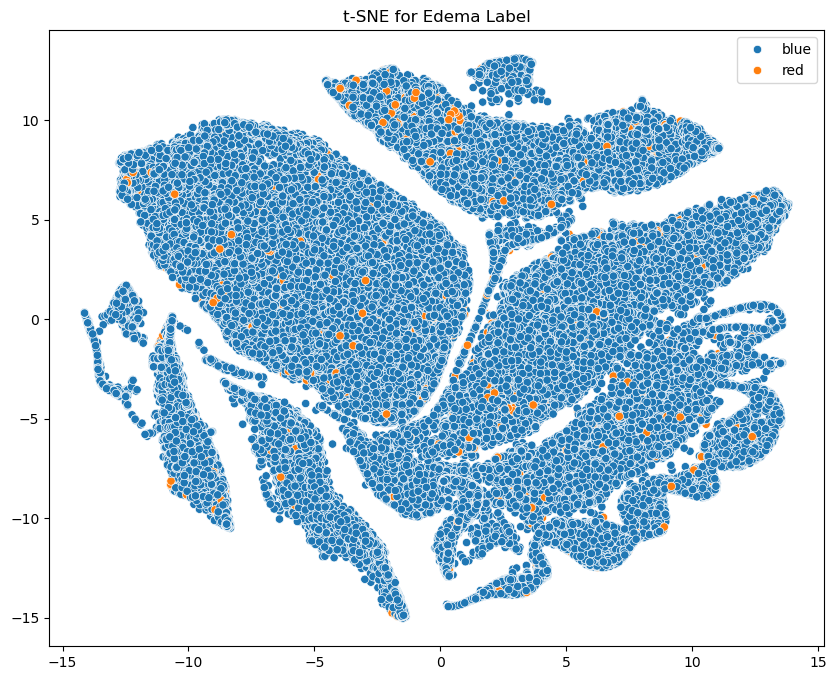

In [53]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=50).fit_transform(X)
tsne = TSNE(n_components=2, perplexity=30, n_iter=300).fit_transform(pca)

disease_idx = unique_labels.index('Edema')
colors = ['red' if label == 1 else 'blue' for label in y[:, disease_idx]]

plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=colors)
plt.title("t-SNE for Edema Label")
plt.show()
